In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

IMAGES_PATH = 'Image'
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
def load_images(path, size=(100,100)):
    X, y = [], []
    for person in os.listdir(path):
        folder = os.path.join(path, person)
        for file in os.listdir(folder):
            img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, size)
            X.append(img.flatten())
            y.append(person)
    return np.array(X), np.array(y)

In [8]:
X, y = load_images("Datasets/archive")

In [9]:
def plot_images(instances, images_per_row = 5, cmap = 'gray'):
    size = 100
    images_per_row = min(len(instances),images_per_row)
    # lay hinh anh tu instances
    images = [instance.reshape(size,size) for instance in instances]
    # tinh so dong
    n_rows = (len(instances)-1) // images_per_row + 1
    row_images = []
    # them o thua
    n_empty = n_rows*images_per_row - len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = cmap)
    plt.axis("off")

Saving figure more_face_plot


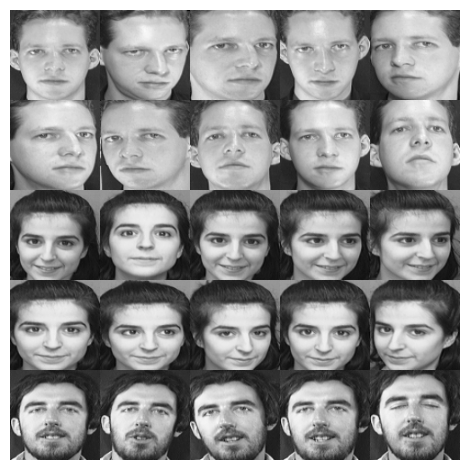

In [10]:
plt.figure()
plot_images(X[:25],cmap ='gray')
save_fig('more_face_plot')
plt.show()